## Arboles de Decicion

In [18]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [87]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [89]:
data.shape

(1599, 12)

In [91]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [93]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 2. Análisis exploratorio de datos (EDA)

In [28]:
print("Información del dataset:")

Información del dataset:


In [30]:
import pandas as pd
url = "winequality-red.csv"
wine_df = pd.read_csv(url, sep=";")

In [32]:
# 2. Análisis exploratorio de datos (EDA)
print("Información del dataset:")
print(wine_df.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB
None


In [34]:
print("\nEstadísticas descriptivas:")
print(wine_df.describe())



Estadísticas descriptivas:
       fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count                                                1599                                                                                               
unique                                               1359                                                                                               
top     7.2,0.36,0.46,2.1,0.07400000000000001,24.0,44....                                                                                               
freq                                                    4                                                                                               


(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

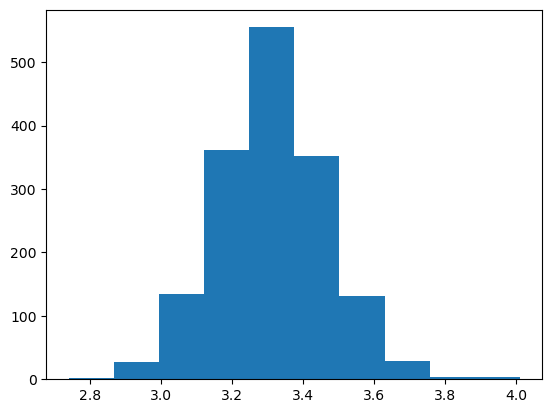

In [36]:
plt.hist(data.pH) 

Vemos en el anterior Histograma que la mayor concentración de vinos se encuentra entre los valores de pH 3.1 y 3.4, con un pico notable alrededor de 3.2, lo que sugiere que ese rango es típico en vinos tintos. Esto puede ser significativo para determinar su calidad y acidez, ya que el pH influye directamente en el sabor y estabilidad del vino.

<Axes: xlabel='residual sugar', ylabel='alcohol'>

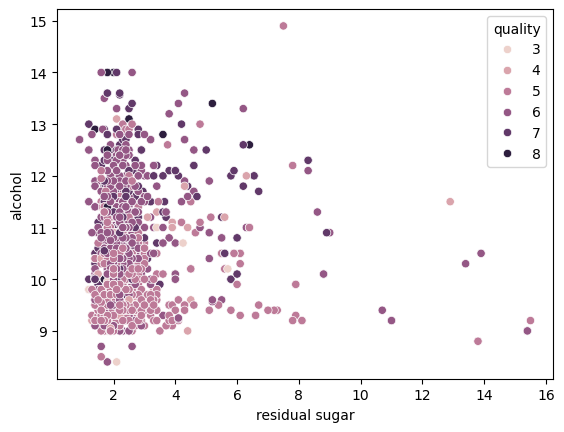

In [39]:
sns.scatterplot(x = "residual sugar", y = "alcohol", hue = "quality", data = data)

*Se evidencia un pico o máxima concentración alrededor de los valores entre 3.1 y 3.4, indicando que esos son los valores predominantes en los vinos analizados. Esto puede reflejar características comunes en los vinos tintos en términos de acidez y equilibrio químico*

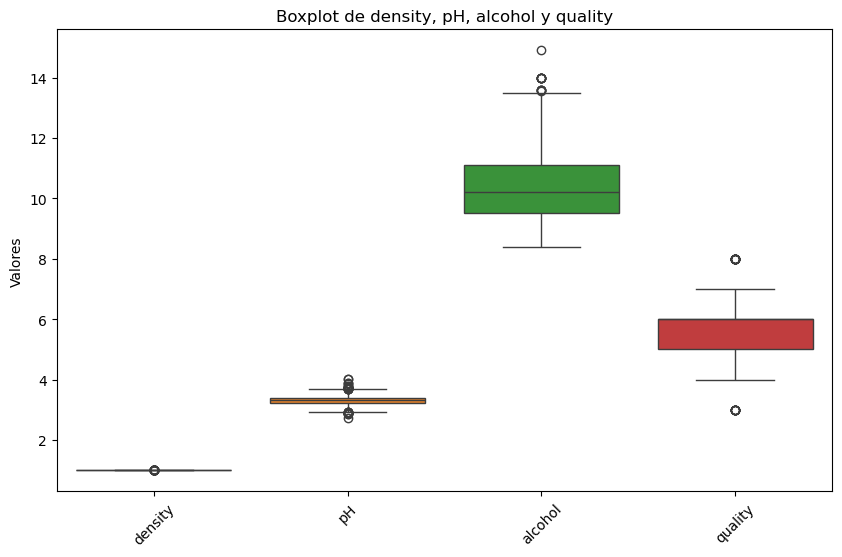

In [42]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['density', 'pH', 'alcohol', 'quality']])
plt.xticks(rotation=45)
plt.title('Boxplot de density, pH, alcohol y quality')
plt.ylabel('Valores')
plt.show()

Density: Parece tener un rango muy estrecho, lo cual es común en mediciones de densidad de líquidos. El boxplot muestra un rango intercuartílico ajustado y algunos posibles valores atípicos fuera de este rango. Para el pH, La distribución también es estrecha, con valores entre aproximadamente 2.8 y 4. Se refleja la concentración típica de pH en los vinos tintos.
    Alcohol: Tiene un rango más amplio comparado con las otras variables. Se observa una concentración en torno a un valor central (mediana), con varios valores fuera del rango intercuartílico, lo que indica la presencia de outliers. Y para  Quality: Muestra la distribución de las calificaciones de calidad, donde los datos parecen concentrarse alrededor de una mediana, con algunos valores extremos tanto por debajo como por encima del rango.


In [238]:
predictors_col = ['alcohol','sulphates']
target_col = ['quality']

In [240]:
predictors = data[predictors_col]
target = data[target_col]

In [244]:
predictors

,alcohol,sulphates
0,9.4,0.56
1,9.8,0.68
2,9.8,0.65
3,9.8,0.58
4,9.4,0.56
...,...,...
1594,10.5,0.58
1595,11.2,0.76
1596,11.0,0.75
1597,10.2,0.71


In [246]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [248]:
corr = predictors.corr()
corr

,alcohol,sulphates
alcohol,1.000000,0.093595
sulphates,0.093595,1.000000


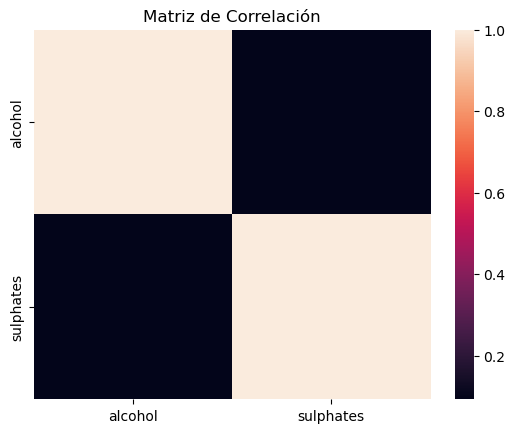

In [250]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [252]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [254]:
tree = DecisionTreeClassifier()

In [256]:
arbol = tree.fit(X_train, y_train)

[Text(0.5165356385536901, 0.975, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.1941925899207182, 0.925, 'x[1] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.35536411423720415, 0.95, 'True  '),
 Text(0.04185612685088026, 0.875, 'x[0] <= 9.533\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.015389996502273523, 0.825, 'x[0] <= 9.075\ngini = 0.206\nsamples = 89\nvalue = [0, 5, 79, 5, 0, 0]'),
 Text(0.007461816485950798, 0.775, 'x[1] <= 0.48\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.003730908242975399, 0.725, 'x[1] <= 0.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.0018654541214876996, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.005596362364463099, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.011192724728926198, 0.725, 'x[1] <= 0.515\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3

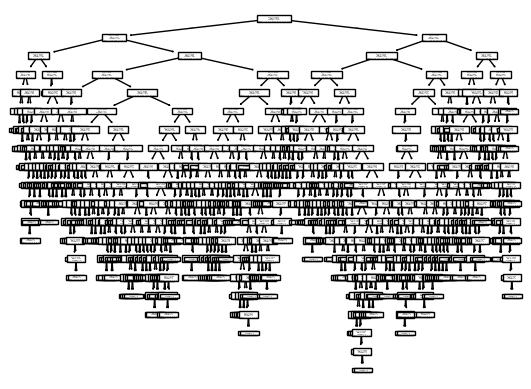

In [259]:
plot_tree(arbol)

In [261]:
predicciones = arbol.predict(X_test)


In [263]:
predicciones

array([6, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 6,
       7, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 7,
       5, 6, 5, 5, 6, 5, 6, 6, 5, 3, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6,
       6, 6, 5, 6, 4, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 8, 6, 5, 5, 5, 7,
       5, 7, 6, 5, 5, 6, 7, 7, 6, 7, 5, 5, 5, 6, 4, 3, 5, 5, 5, 7, 6, 5,
       5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5, 5, 7, 4, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5, 4, 6, 5, 5, 5, 5, 5, 6, 3,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 8, 7,
       6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 8, 5, 7,
       6, 6, 6, 6, 5, 5, 5, 4, 5, 6, 6, 5, 6, 4, 6, 6, 6, 3, 6, 5, 6, 6,
       6, 4, 5, 5, 8, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 5, 5, 6, 4, 7, 4, 5,
       6, 5, 5, 7, 6, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       7, 7, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6,

In [265]:
# Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,1,5,2,0,0
5,2,3,101,40,0,0
6,2,7,43,54,14,4
7,0,0,5,18,12,0
8,0,0,0,5,1,0


In [267]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.525

In [269]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.5240225616150663

In [271]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.525

In [273]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5233802184882059